# Adams Bashforth
#### John S Butler 
john.s.butler@tudublin.ie  
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)



The Adams Bashforth method is an explicit multistep method. This notebook illustrates the 2 step Adams Bashforth method for a linear initial value problem, given by

$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1.$$
The video below walks through the notebook.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/etob5sngUUc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Python Libraries

In [1]:
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a\leq t \leq b$  and number of steps  $N$ 
$$h=\frac{b−a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
$$h=\frac{2−0}{4}=0.5.$$
 
This gives the discrete time steps,
$$t_i=0+i0.5,$$
for  $i=0,1,⋯,4.$

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

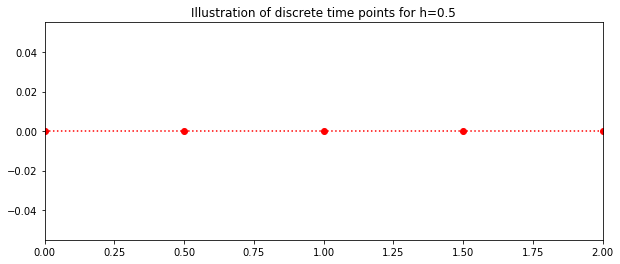

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Exact Solution
THe initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.$$
The figure below plots the exact solution.

Text(0.5, 0, 'time')

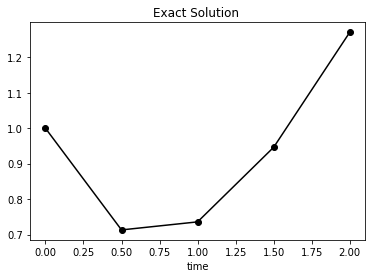

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

## 2-step Adams Bashforth

The general 2-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(3f(t_i,w_i)-f(t_{i-1},w_{i-1})). $$
For the specific intial value problem the 2-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(3(t_i-w_i)-(t_{i-1}-w_{i-1})). $$

for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(3(t_0-w_0)-(t_{-1}-w_{-1})), $$
this is not solvable as <font color='red'> $w_{-1}$ </font>is unknown.
for $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(3(t_1-w_1)-(t_{0}-w_{0})), $$
this is not solvable as <font color='red'> $w_{1}$ </font>is unknown, but it can be approximated using a one step method.
Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$

In [6]:
### Initial conditions
w=np.zeros(len(t))
w[0]=IC
w[1]=y[1] # NEED FOR THE METHOD

### Loop

In [7]:
for k in range (1,N):
    w[k+1]=w[k]+h/2.0*(3*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1]))   

### Plotting solution

In [8]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'s:',color='blue',label='Adams-Bashforth')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the 2 step Adams-Bashforth approximation (red) of the intial value problem

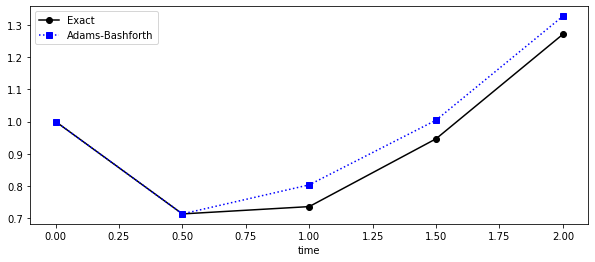

In [9]:
plotting(t,w,y)

## Local Error 
The Error for the 2 step Adams Bashforth is:
$$y_{n+1}=y_n+\frac{h}{2}[3f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{5h^3}{12}y'''(\eta),$$
where $\eta \in [t_{n-1},t_{n+1}]$.

Rearranging the equations gives 
$$\frac{y_{n+1}-y_n}{h}=\frac{1}{2}[3f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{5h^2}{12}y'''(\eta)$$  

For our specific initial value problem the error is of the form:
$$\frac{5h^2}{12}y'''(\eta)=\frac{5h^2}{12}2e^{-\eta} \leq\frac{5(0.5)^2}{12} 2\leq 0.208 $$

In [11]:

d = {'time t_i': t, 'Adams Bashforth, w_i': w,'Exact':y,'Error |w-y|':np.round(np.abs(y-w),5),'LTE':round(2*0.5**2/12*5,5)}
df = pd.DataFrame(data=d)
df

,time t_i,"Adams Bashforth, w_i",Exact,Error |w-y|,LTE
0,0.0,1.000000,1.000000,0.00000,0.20833
1,0.5,0.713061,0.713061,0.00000,0.20833
2,1.0,0.803265,0.735759,0.06751,0.20833
3,1.5,1.004082,0.946260,0.05782,0.20833
4,2.0,1.326837,1.270671,0.05617,0.20833
